In [1]:
import pandas as pd
import json 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nodes = json.load(open('./node_list.json', 'rb'))
edges = json.load(open('./edge_list.json', 'rb'))

In [3]:
DirectG = nx.DiGraph()

In [4]:
# NODE Colors
color_mapping= {
    "Mondstadt" : "#aff8db",
    "Liyue": "#ffcbc1",
    "Inazuma" : "#d5aaff",
    "Snezhnaya": "#ace7ff", 
    "Sumeru" : "#A9B388",
    "Fontaine" : "#008CFF"
}

In [5]:
[DirectG.add_node(node["id"], nation=node["nation"]) for node in nodes];

In [6]:
[DirectG.add_edge(edge['From'], edge['to'], type=edge['type']) for edge in edges];

In [7]:
# Handle None values in node_colors list by assigning a default color
default_color = "#d1d1d1"
node_colors = [color_mapping.get(n[1].get("nation", default_color)) for n in list(DirectG.nodes(data=True))]
node_colors = [color if color is not None else default_color for color in node_colors]

In [8]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(DirectG, k=0.25, iterations=25)

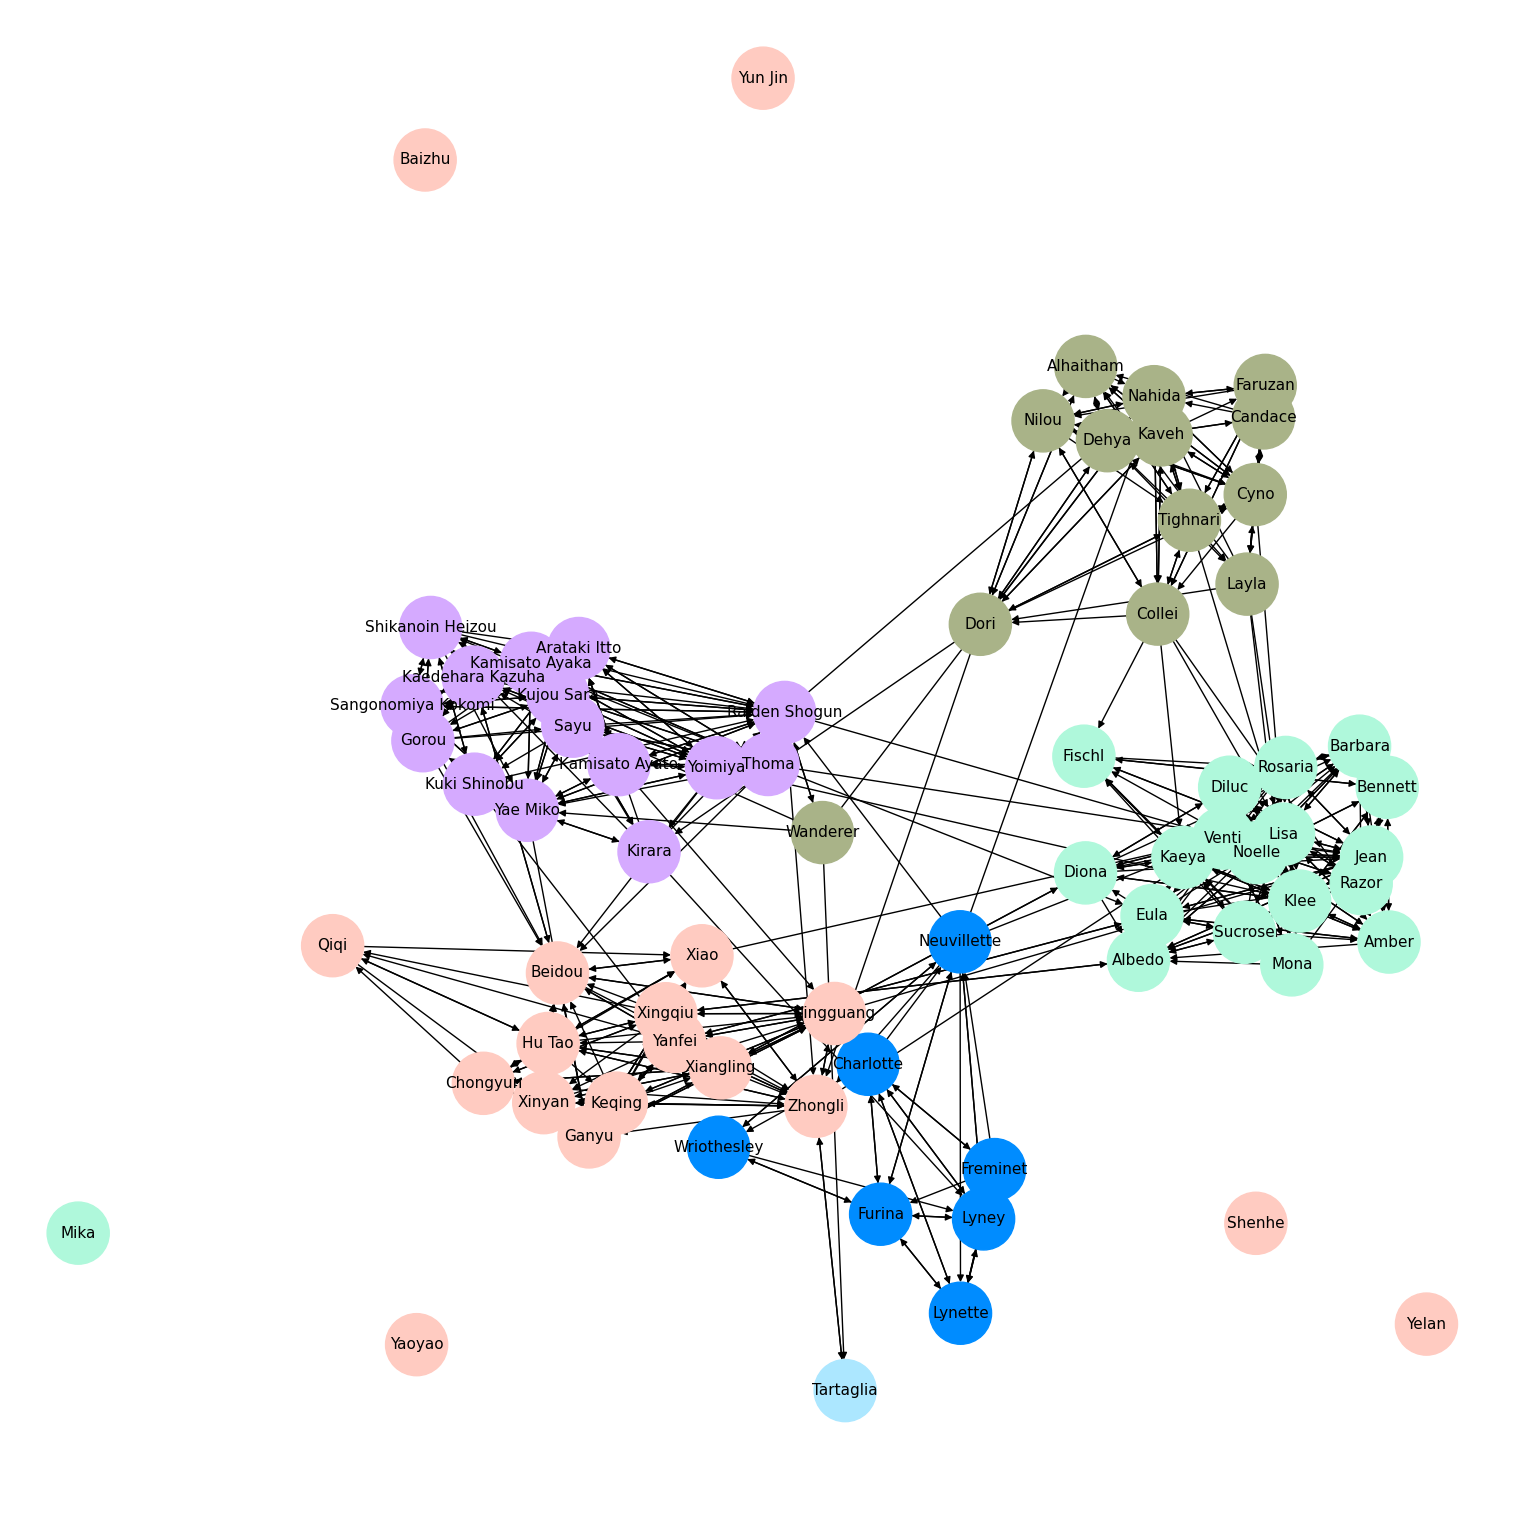

In [9]:
plt.figure(1,figsize=(15,15)) 
nx.draw(DirectG, 
        nodelist=DirectG.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig('directed.png')

plt.show()

In [10]:
DirectG.number_of_nodes()

73

In [11]:
DirectG.number_of_edges()

516

In [12]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(70)
#higher indegree = mentioned the most

,id,nation,in_degree
51,Lisa,Mondstadt,18
57,Jean,Mondstadt,17
9,Raiden Shogun,Inazuma,16
25,Zhongli,Liyue,14
10,Yae Miko,Inazuma,14
...,...,...,...
64,Candace,Sumeru,2
60,Wanderer,Sumeru,1
58,Mika,Mondstadt,0
39,Shenhe,Liyue,0


In [13]:
# average in-degree
dir_nodes_df['in_degree'].mean()

7.068493150684931

In [14]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(30)
# out degree= measure how many characters a particular character knows.

,id,nation,in_degree,out_degree
18,Thoma,Inazuma,7,12
51,Lisa,Mondstadt,18,12
9,Raiden Shogun,Inazuma,16,12
10,Yae Miko,Inazuma,14,12
40,Kaeya,Mondstadt,13,11
12,Yoimiya,Inazuma,9,11
42,Klee,Mondstadt,13,11
45,Eula,Mondstadt,7,11
20,Kujou Sara,Inazuma,13,11
57,Jean,Mondstadt,17,11


In [15]:
# average out-degree
dir_nodes_df['out_degree'].mean()

7.068493150684931

C:\Users\tiffa\AppData\Local\Temp\ipykernel_13488\3062997739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
C:\Users\tiffa\AppData\Local\Temp\ipykernel_13488\3062997739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])


<Axes: xlabel='out_degree', ylabel='count'>

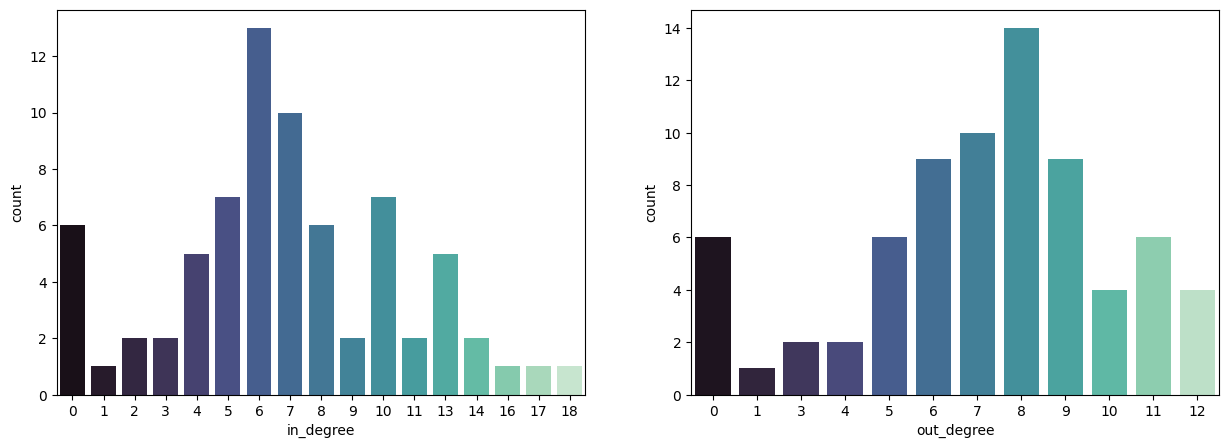

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])

In [17]:
# calculate page rank centrality
pr = nx.pagerank(DirectG)

dir_nodes_df['page_rank'] = dir_nodes_df['id'].apply(lambda n: pr[n])
dir_nodes_df[['id', 'nation', 'page_rank']].sort_values('page_rank', ascending=False).head(10)

,id,nation,page_rank
57,Jean,Mondstadt,0.038394
51,Lisa,Mondstadt,0.037833
25,Zhongli,Liyue,0.029569
40,Kaeya,Mondstadt,0.029328
42,Klee,Mondstadt,0.029304
44,Diluc,Mondstadt,0.024980
46,Albedo,Mondstadt,0.024895
48,Barbara,Mondstadt,0.023702
47,Amber,Mondstadt,0.022955
30,Beidou,Liyue,0.022427


In [18]:
# setting up undirected graph
Graph = DirectG.to_undirected(reciprocal=True)

In [19]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=25)
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

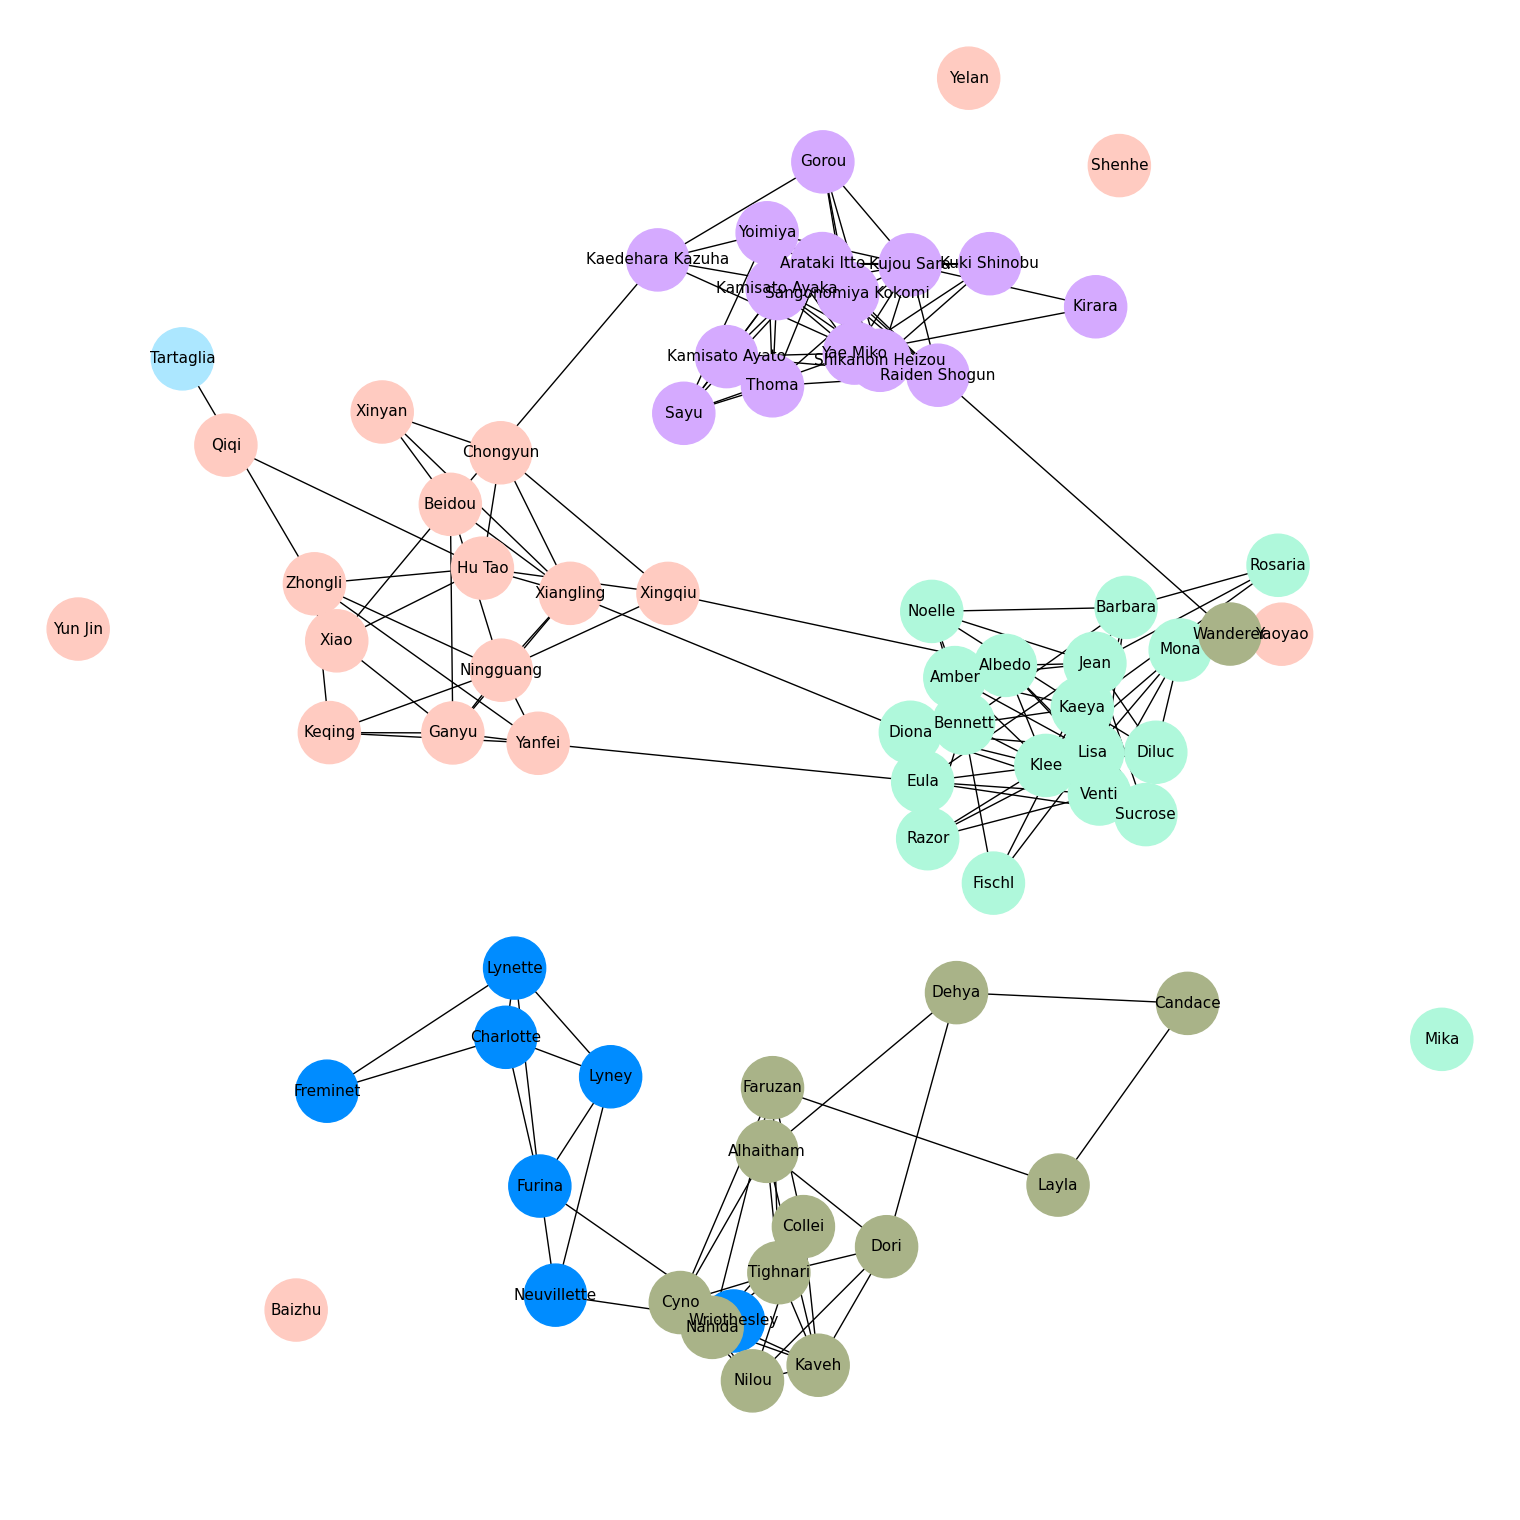

In [20]:
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, 
        nodelist=Graph.nodes,
        pos = pos,
        node_size = 2000,
        node_color = node_colors,
        with_labels = True,
        font_size = 11,
        font_color = 'black')

# uncomment next line to save drawing as an image
# plt.savefig("undir_0.png", format="PNG")
plt.show()

In [21]:
# remove isolates from undirected graph
isolates = list(nx.isolates(Graph))
Graph.remove_nodes_from(isolates)

In [22]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=20)

# recolour nodes
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

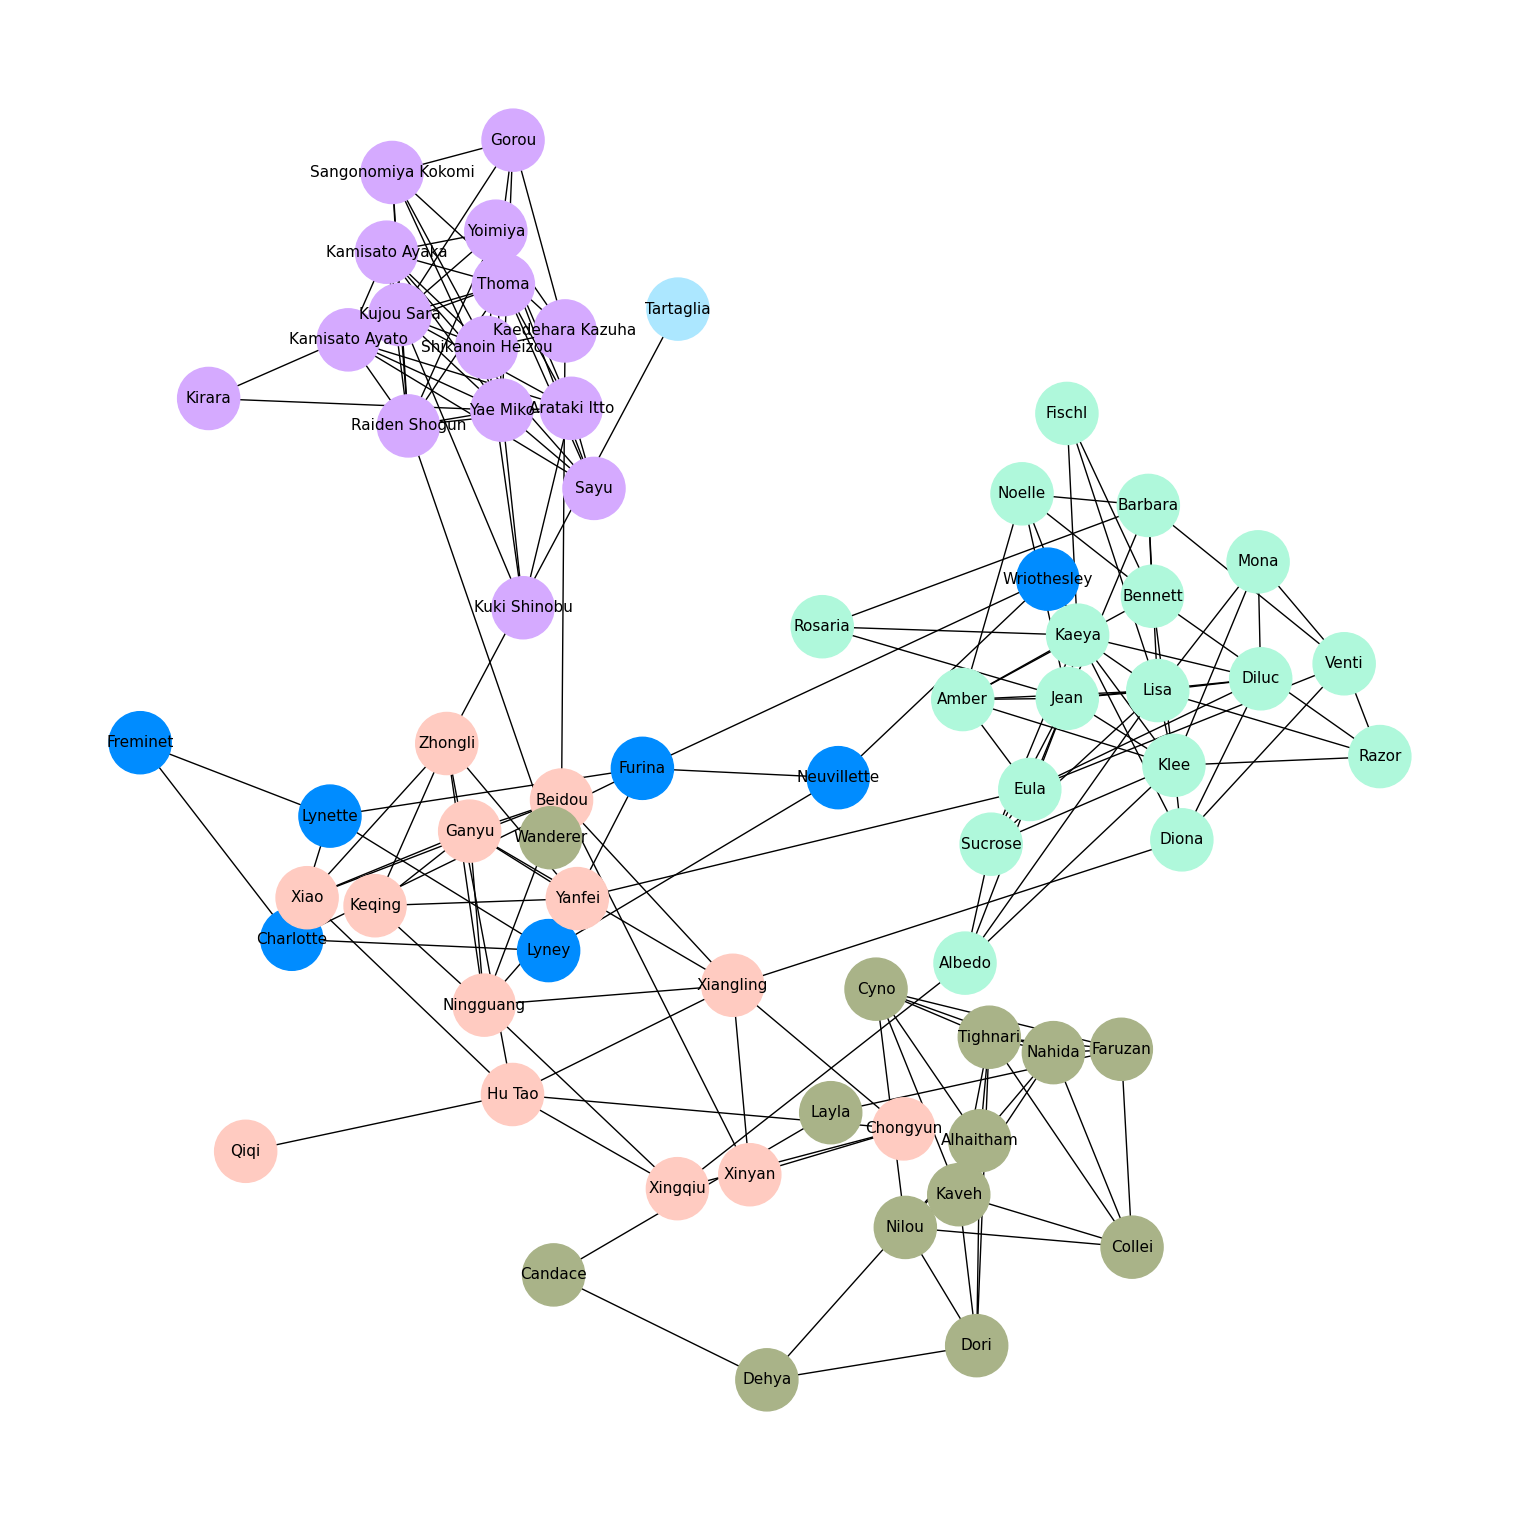

In [23]:
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, pos=pos, node_size=2000, node_color=node_colors, with_labels=True, font_size=11)

# uncomment line below to save drawing as an image
# plt.savefig("undirected_no_isolates.png", format="PNG")

In [24]:
Graph.number_of_nodes()

67

In [25]:
Graph.number_of_edges()

181

In [26]:
# initialise undirected network dataframe of characters
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolates)]

In [27]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(Graph.edges(n)))
undir_df.sort_values('degree', ascending=False).head(30)

,id,nation,degree
10,Yae Miko,Inazuma,11
57,Jean,Mondstadt,11
51,Lisa,Mondstadt,11
20,Kujou Sara,Inazuma,11
42,Klee,Mondstadt,10
40,Kaeya,Mondstadt,10
9,Raiden Shogun,Inazuma,9
12,Yoimiya,Inazuma,8
16,Arataki Itto,Inazuma,8
7,Kamisato Ayaka,Inazuma,8


In [28]:
close_cen = nx.closeness_centrality(Graph)
# close_cen = dict(sorted(close_cen.items(), key=lambda item: item[1], reverse=True))
undir_df['closeness'] = undir_df['id'].apply(lambda node: close_cen[node])
undir_df.sort_values('closeness', ascending=False).head(10)

,id,nation,degree,closeness
24,Xiangling,Liyue,7,0.257459
30,Beidou,Liyue,6,0.253558
28,Ningguang,Liyue,7,0.240789
53,Diona,Mondstadt,5,0.235702
31,Ganyu,Liyue,6,0.234054
8,Kaedehara Kazuha,Inazuma,5,0.226147
29,Xingqiu,Liyue,4,0.223131
26,Yanfei,Liyue,5,0.223131
22,Xinyan,Liyue,3,0.215934
32,Hu Tao,Liyue,6,0.213183


In [29]:
# calcuate betweenness centrality for each character 
bet_cen = nx.betweenness_centrality(Graph)

undir_df['betweenness'] = undir_df['id'].apply(lambda node: bet_cen[node])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
30,Beidou,Liyue,6,0.253558,0.234656
8,Kaedehara Kazuha,Inazuma,5,0.226147,0.224204
24,Xiangling,Liyue,7,0.257459,0.160344
53,Diona,Mondstadt,5,0.235702,0.139707
12,Yoimiya,Inazuma,8,0.193466,0.092213
28,Ningguang,Liyue,7,0.240789,0.054332
26,Yanfei,Liyue,5,0.223131,0.050038
40,Kaeya,Mondstadt,10,0.204084,0.047317
45,Eula,Mondstadt,6,0.206603,0.046606
42,Klee,Mondstadt,10,0.205336,0.038160


In [30]:
# calculate each character's eigenvector centrality
eigen_cen = nx.eigenvector_centrality(Graph, max_iter= 500)

undir_df['eigen'] = undir_df['id'].apply(lambda node: eigen_cen[node])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

,id,nation,degree,eigen
10,Yae Miko,Inazuma,11,0.364428
20,Kujou Sara,Inazuma,11,0.360743
9,Raiden Shogun,Inazuma,9,0.324153
12,Yoimiya,Inazuma,8,0.308727
7,Kamisato Ayaka,Inazuma,8,0.308463
16,Arataki Itto,Inazuma,8,0.306587
18,Thoma,Inazuma,7,0.280864
15,Kamisato Ayato,Inazuma,6,0.244826
13,Sayu,Inazuma,6,0.243003
11,Sangonomiya Kokomi,Inazuma,6,0.201570


In [100]:
# initialise ranking dataframe
ranked_df = undir_df[['id', 'nation']].copy()

In [101]:
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)

In [102]:
# add rank of characters based on different undirected network centrality values
undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

In [103]:
# add average rank column
ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
24,Xiangling,Liyue,11,1,3,18,8.25
12,Yoimiya,Inazuma,8,21,5,4,9.50
30,Beidou,Liyue,20,2,1,17,10.00
28,Ningguang,Liyue,14,3,6,20,10.75
8,Kaedeh...,Inazuma,35,6,2,14,14.25
10,Yae Miko,Inazuma,1,36,20,1,14.50
11,Sangon...,Inazuma,17,22,12,10,15.25
42,Klee,Mondstadt,6,15,10,30,15.25
40,Kaeya,Mondstadt,5,17,8,31,15.25
20,Kujou ...,Inazuma,2,37,23,2,16.00


In [104]:
ranked_df

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
10,Yae Miko,Inazuma,1,36,20,1,14.50
20,Kujou ...,Inazuma,2,37,23,2,16.00
9,Raiden...,Inazuma,7,39,18,3,16.75
12,Yoimiya,Inazuma,8,21,5,4,9.50
7,Kamisa...,Inazuma,9,40,28,5,20.50
16,Aratak...,Inazuma,10,41,32,6,22.25
18,Thoma,Inazuma,16,42,41,7,26.50
15,Kamisa...,Inazuma,28,46,57,8,34.75
13,Sayu,Inazuma,26,44,43,9,30.50
11,Sangon...,Inazuma,17,22,12,10,15.25


In [111]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([node["id"] for node in nodes])

# Add edges
G.add_edges_from([(edge["From"], edge["to"]) for edge in edges])

# Create a DataFrame for node features
node_features = pd.DataFrame(nodes)
node_features.set_index("id", inplace=True)

# Add graph-based features to the DataFrame
node_features["degree_rank"] = pd.Series(dict(nx.degree_centrality(G)))
node_features["closeness_rank"] = pd.Series(dict(nx.closeness_centrality(G)))
node_features["betweenness_rank"] = pd.Series(dict(nx.betweenness_centrality(G)))
node_features["eigen_rank"] = pd.Series(dict(nx.eigenvector_centrality(G)))
node_features["average_rank"] = node_features[["degree_rank", "closeness_rank", "betweenness_rank", "eigen_rank"]].mean(axis=1)

# Define the target variable (binary: important or not)
node_features["is_important"] = node_features["average_rank"].apply(lambda x: 1 if x > node_features["average_rank"].mean() else 0)

# Features for training
features = node_features[["degree_rank", "closeness_rank", "betweenness_rank", "eigen_rank", "average_rank"]]

# Target variable
target = node_features["is_important"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)  # Define y_test_tensor here

# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = SimpleNN(input_size=X_train_tensor.shape[1])

In [112]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    print(f"Accuracy: {accuracy * 100:.2f}%")

node_features["predicted_class"] = model(torch.FloatTensor(features.values)).detach().numpy()

Accuracy: 93.33%


In [113]:
# Display the DataFrame with predictions
from IPython.display import display
display(node_features)

#0 is not important
#1 is important

,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank,is_important,predicted_class
id,,,,,,,,
Neuvillette,Fontaine,0.138889,0.461832,0.127464,5.6965...,1.9628...,1,0.513973
Wriothesley,Fontaine,0.055556,0.315104,0.000000,8.1746...,9.4708...,0,0.501549
Lyney,Fontaine,0.097222,0.334254,0.009085,1.7506...,1.1451...,0,0.503844
Lynette,Fontaine,0.069444,0.316754,0.000000,8.9559...,9.8788...,0,0.501979
Freminet,Fontaine,0.069444,0.316754,0.000000,8.9559...,9.8788...,0,0.501979
Furina,Fontaine,0.083333,0.318421,0.000196,9.6119...,1.0289...,0,0.502411
Charlotte,Fontaine,0.083333,0.318421,0.000196,9.6119...,1.0289...,0,0.502411
Kamisato Ayaka,Inazuma,0.138889,0.366667,0.000998,1.2354...,1.5752...,1,0.511928
Kaedehara Kazuha,Inazuma,0.152778,0.382911,0.006369,1.2089...,1.6573...,1,0.512808


In [114]:
pd.set_option('display.max_rows', None)

# Display the entire DataFrame
from IPython.display import display
display(node_features)
with pd.option_context('display.max_rows', None):
    print(node_features)

,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank,is_important,predicted_class
id,,,,,,,,
Neuvillette,Fontaine,0.138889,0.461832,0.127464,5.6965...,1.9628...,1,0.513973
Wriothesley,Fontaine,0.055556,0.315104,0.000000,8.1746...,9.4708...,0,0.501549
Lyney,Fontaine,0.097222,0.334254,0.009085,1.7506...,1.1451...,0,0.503844
Lynette,Fontaine,0.069444,0.316754,0.000000,8.9559...,9.8788...,0,0.501979
Freminet,Fontaine,0.069444,0.316754,0.000000,8.9559...,9.8788...,0,0.501979
Furina,Fontaine,0.083333,0.318421,0.000196,9.6119...,1.0289...,0,0.502411
Charlotte,Fontaine,0.083333,0.318421,0.000196,9.6119...,1.0289...,0,0.502411
Kamisato Ayaka,Inazuma,0.138889,0.366667,0.000998,1.2354...,1.5752...,1,0.511928
Kaedehara Kazuha,Inazuma,0.152778,0.382911,0.006369,1.2089...,1.6573...,1,0.512808


               nation  degree_rank  closeness_rank  betweenness_rank  \
id                                                                     
Neuvill...   Fontaine   0.138889     0.461832        0.127464          
Wriothe...   Fontaine   0.055556     0.315104        0.000000          
Lyney        Fontaine   0.097222     0.334254        0.009085          
Lynette      Fontaine   0.069444     0.316754        0.000000          
Freminet     Fontaine   0.069444     0.316754        0.000000          
Furina       Fontaine   0.083333     0.318421        0.000196          
Charlotte    Fontaine   0.083333     0.318421        0.000196          
Kamisat...    Inazuma   0.138889     0.366667        0.000998          
Kaedeha...    Inazuma   0.152778     0.382911        0.006369          
Raiden ...    Inazuma   0.263889     0.500000        0.122397          
Yae Miko      Inazuma   0.208333     0.400662        0.014904          
Sangono...    Inazuma   0.097222     0.355882        0.001230   